# import imp Libraries  

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [204]:
df = pd.read_csv('TelcoChurn1.csv')

In [213]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [26]:
df.shape

(7043, 21)

In [27]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [16]:
# cheing missing values .

df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [28]:
# drop id from data frame 

df = df.drop('customerID',axis='columns') # id is not predictive of anything .


In [32]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [35]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Define target and feature variable .

In [7]:
x = df.drop('Churn',axis='columns')
y = df[['Churn']]

In [10]:
# Convert y varilable in 1 and 0 
y['Churn']=y['Churn'].map({'Yes':1 ,'No':0})

In [11]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [17]:
# count how many got canceled
y['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [19]:
# churn rate 
y.mean()

Churn    0.26537
dtype: float64

# Split the features(x) into numerical and categorical data .

In [20]:
char = x.select_dtypes(include='object')
num = x.select_dtypes(include='number')

In [21]:
num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [39]:
num.describe()
num.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [45]:
char.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


# Droping the indicator features from num and buld separte Df

In [40]:
ind = num[['SeniorCitizen']]
num = num.drop(['SeniorCitizen'],axis=1)

In [41]:
num.dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [42]:
ind.dtypes

SeniorCitizen    int64
dtype: object

In [43]:
char.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
dtype: object

# Outlier Analysis if numerical features 

In [44]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
1%,1.000000,19.200000,19.871000
5%,1.000000,19.650000,49.070000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000


# Capping and floring of outlier 

In [47]:
def outlier_cap(X):
    X= X.clip(lower=X.quantile(0.01))
    X= X.clip(upper=X.quantile(0.99))
    return(X)

In [49]:
num = num.apply(lambda X:outlier_cap(X))

In [50]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.372710,64.749689,2277.243407
std,24.557454,30.062810,2260.002318
min,1.000000,19.200000,19.871000
1%,1.000000,19.200000,19.883180
5%,1.000000,19.650000,49.070000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000


# Missung values analysis 

In [55]:
num.isnull().mean()

tenure            0.0
MonthlyCharges    0.0
TotalCharges      0.0
dtype: float64

## Feature selection - Numerical Features 

## Part 1 : Remove Features with zero varisances 

In [56]:
from sklearn.feature_selection import VarianceThreshold

varselector = VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# get columan to keep and create new dataframe with those only 
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [57]:
num_1.iloc[0]

tenure             1.00
MonthlyCharges    29.85
TotalCharges      29.85
Name: 0, dtype: float64

# Part 2 : Bi Variate analysis (Feature discretization )

In [59]:
from sklearn.preprocessing import KBinsDiscretizer
discrete = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
num_binned = pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index,
                        columns=num_1.columns).add_suffix('_Rank')

num_binned.head()


,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank
0,0.0,2.0,0.0
1,5.0,3.0,5.0
2,1.0,3.0,1.0
3,6.0,2.0,5.0
4,1.0,5.0,1.0


In [60]:
x_bin_combind = pd.concat([y,num_binned],axis=1,join='inner')

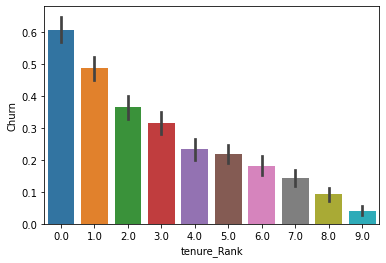

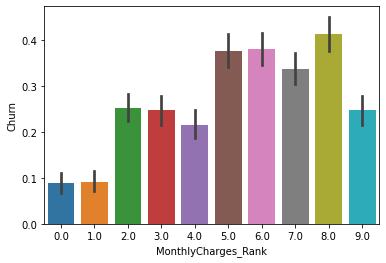

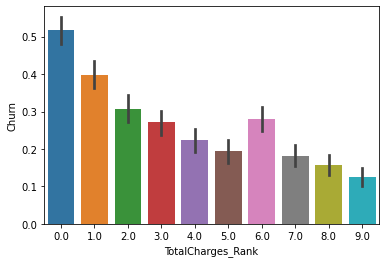

In [83]:
from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col, y=x_bin_combind.Churn,data=x_bin_combind, estimator=mean )
plt.show()

- All fetures from num will get selcted as due to discrimination .

In [114]:
select_features_df_num = num_1

# Features selection for catogiracal error 

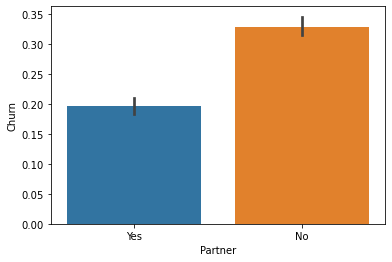

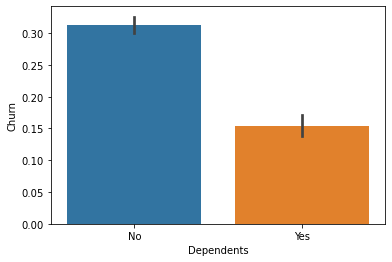

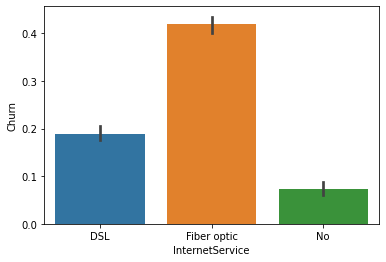

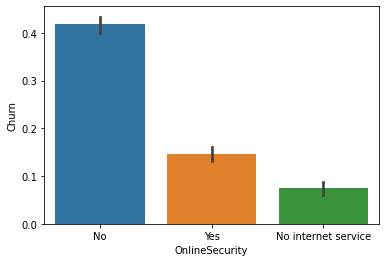

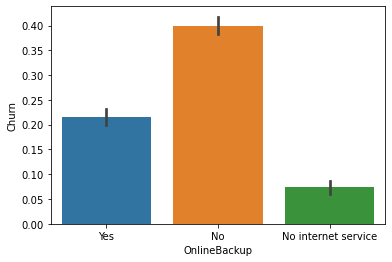

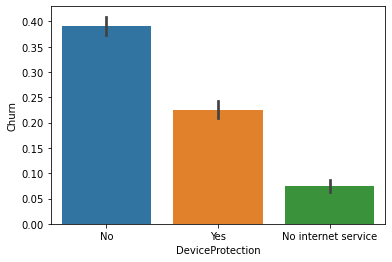

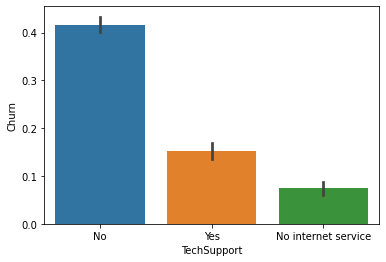

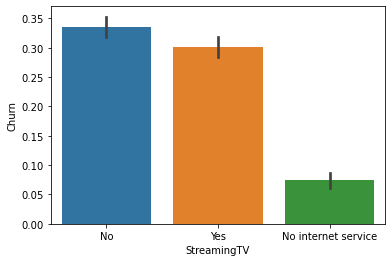

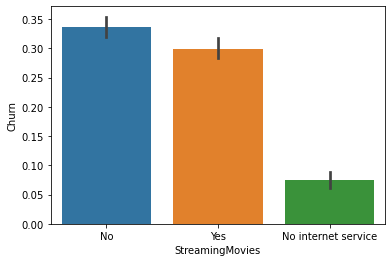

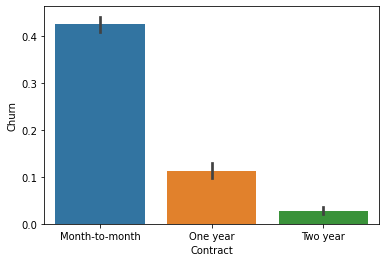

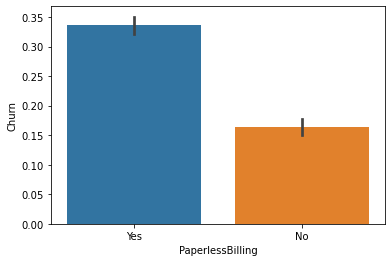

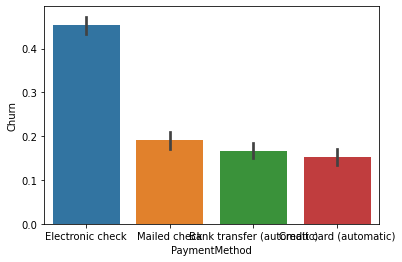

In [91]:
import matplotlib.pyplot as plt 
import seaborn as sns

x_char_mearged = pd.concat([y,char],axis=1,join='inner')
for col in (char.columns):
    plt.figure()
    sns.barplot(x=col, y=x_char_mearged.Churn,data=x_char_mearged, estimator=mean )
plt.show()


In [87]:
char= char.drop(['gender','MultipleLines','PhoneService'],axis=1)

In [92]:
char.head()

,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [96]:
# craeted dummy features with n-1 levels

x_char_dum = pd.get_dummies(char,drop_first=True)
x_char_dum.head(5)

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


##  Part 2 - Select K best 

- select k best for categorical features 



In [99]:

from sklearn.feature_selection import SelectKBest ,chi2
selector = SelectKBest(chi2,k=20)
selector.fit_transform(x_char_dum,y)

# get columns to keep and create new datafarme with those only 
cols = selector.get_support(indices=True)
select_features_df_char = x_char_dum.iloc[:,cols]

In [104]:
select_features_df_char.shape

(7043, 20)

- Feature selection - numerical indicator features 

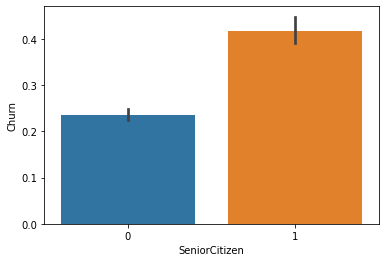

In [110]:
x_ind_merged = pd.concat([y,ind],axis=1,join='inner')
for col in (ind.columns):
    plt.figure()
    sns.barplot(x=col, y=x_ind_merged.Churn,data=x_ind_merged, estimator=mean )
plt.show()

In [115]:
select_features_df_ind=ind

# Creating the Master feature Set for model Development .

In [116]:
x_all = pd.concat([select_features_df_char,select_features_df_num,select_features_df_ind],axis=1,join='inner')

# Train and test split 

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x_all, y, test_size=0.3, random_state=99)

In [162]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("churan Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (4930, 24)
Shape of Testing Data (2113, 24)
churan Rate in Training Data Churn    0.265314
dtype: float64
Response Rate in Testing Data Churn    0.265499
dtype: float64


In [163]:
# Non Linearity in feature relationships are observed which makes tree methods a good choice
# There are few options to consider among tree methods
# White Box (Completely Explainable Set of Rules) - Decision Tree
# Ensemble Methods - Random Forest (With Bagging)
# Ensemble Methods - GBM/XGBoost (Boosting)

In [170]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [172]:
logreg.score(X_test,y_test)

0.7974443918599148

In [174]:
coeff_df=pd.DataFrame(x_all.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,Partner_Yes,-0.030189
1,Dependents_Yes,-0.247596
2,InternetService_Fiber optic,0.470407
3,InternetService_No,-0.168329
4,OnlineSecurity_No internet service,-0.168329
5,OnlineSecurity_Yes,-0.503546
6,OnlineBackup_No internet service,-0.168329
7,OnlineBackup_Yes,-0.228548
8,DeviceProtection_No internet service,-0.168329
9,DeviceProtection_Yes,-0.119568


In [175]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [183]:
#np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_split': 50}


In [184]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=5,min_samples_split=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=0)

In [185]:
!pip install pydotplus

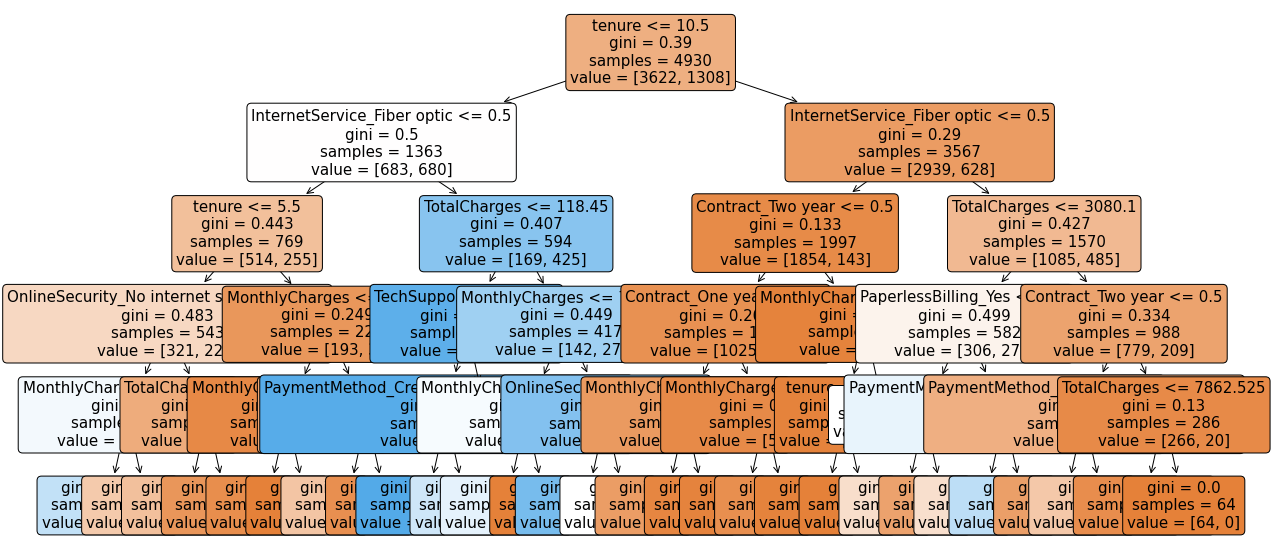

In [182]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[100,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=x_all.columns)
plt.show()

In [189]:
#dtree.score(X_test,y_test)

In [190]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=50, random_state=0)

In [191]:
 #Model Evaluation
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)


In [192]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [193]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.7974443918599148
Precision 0.6436285097192225
Recall 0.5311942959001783
f1_score 0.58203125


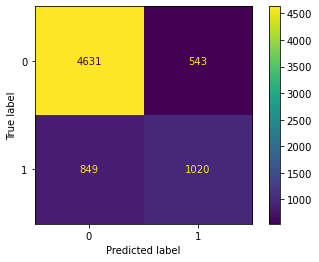

In [196]:
metrics.plot_confusion_matrix(logreg,x_all,y)

In [197]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.7889256980596309
Precision 0.631578947368421
Recall 0.4919786096256685
f1_score 0.5531062124248498


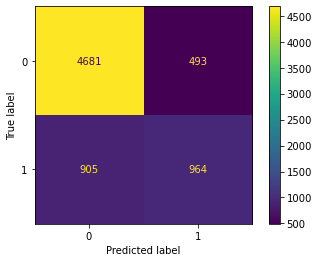

In [199]:
metrics.plot_confusion_matrix(dtree,x_all,y)

In [200]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.7950780880265026
Precision 0.6649484536082474
Recall 0.45989304812834225
f1_score 0.5437302423603794


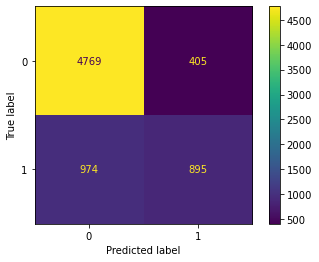

In [202]:
metrics.plot_confusion_matrix(rf,x_all,y)